### Importing Libraries

In [22]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Import MNIST Dataset

In [4]:
from tensorflow.keras.datasets import mnist
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

##### Plot an Image Example

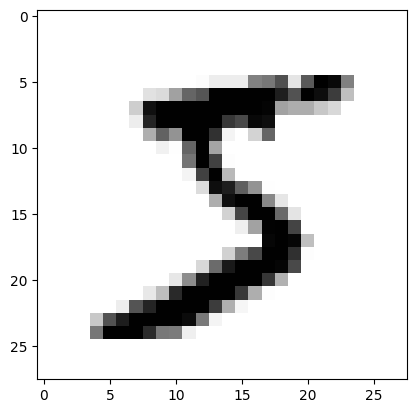

5

In [5]:
plt.imshow(x_train[0],cmap = 'binary')
plt.show()
y_train[0]

##### Display Labels

In [6]:
#gives unique values in y_train
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

### Preprocessing

##### One-Hot Encoding

In [7]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [8]:
y_train_encoded.shape

(60000, 10)

In [9]:
y_train_encoded[0] #displays 5 

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

### Building a Neural Network

##### Linear Equations

![Single Neuron](images/1_2.png)

The above graph simply represents the equation:

\begin{equation}
y = w1 * x1 + w2 * x2 + w3 * x3 + b
\end{equation}

Where the `w1, w2, w3` are called the weights and `b` is an intercept term called bias. The equation can also be *vectorised* like this:

\begin{equation}
y = W . X + b
\end{equation}

Where `X = [x1, x2, x3]` and `W = [w1, w2, w3].T`. The .T means *transpose*. This is because we want the dot product to give us the result we want i.e. `w1 * x1 + w2 * x2 + w3 * x3`. This gives us the vectorised version of our linear equation.

A simple, linear approach to solving hand-written image classification problem - could it work?

![Single Neuron with 784 features](images/1_3.png)

##### Neural Networks

![Neural Network with 2 hidden layers](images/1_4.png)

##### Unrolling N-dimensional Arrays to Vectors

In [10]:
#from 28x28 -> 784x1
x_train_reshape = np.reshape(x_train,(60000,784))
x_test_reshape = np.reshape(x_test,(10000,784))

In [18]:
print(set(x_train_reshape[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


##### Data Normalization

In [12]:
scaler = StandardScaler()
x_train_normalized = scaler.fit_transform(x_train_reshape) 
x__test_normalized = scaler.fit_transform(x_test_reshape) 

### Model Creation

In [23]:
model = Sequential([
    Dense(128,activation='relu',input_shape=(784,)),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

c:\Users\Krishnansh Verma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##### Activation Functions

The first step in the node is the linear sum of the inputs:
\begin{equation}
Z = W . X + b
\end{equation}

The second step in the node is the activation function output:

\begin{equation}
A = f(Z)
\end{equation}

Graphical representation of a node where the two operations are performed:

![ReLU](images/1_5.png)

##### Compiling the Model

In [25]:
model.compile(
    optimizer='sgd',#stochastic gradient descent
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

### Model Training & Evaluation

In [30]:
model.fit(x_train_normalized,y_train_encoded,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9902 - loss: 0.0388
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9910 - loss: 0.0349
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9917 - loss: 0.0339
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9933 - loss: 0.0293
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9939 - loss: 0.0279
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9953 - loss: 0.0247
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9962 - loss: 0.0209
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9964 - loss: 0.0182
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9969 - loss: 0.0175
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9976 - loss: 0.0157


### Predictions and Visualization


In [31]:
loss,accuracy = model.evaluate(x__test_normalized,y_test_encoded)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9653 - loss: 0.1478
0.9700000286102295


In [32]:
y_pred = model.predict(x__test_normalized)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


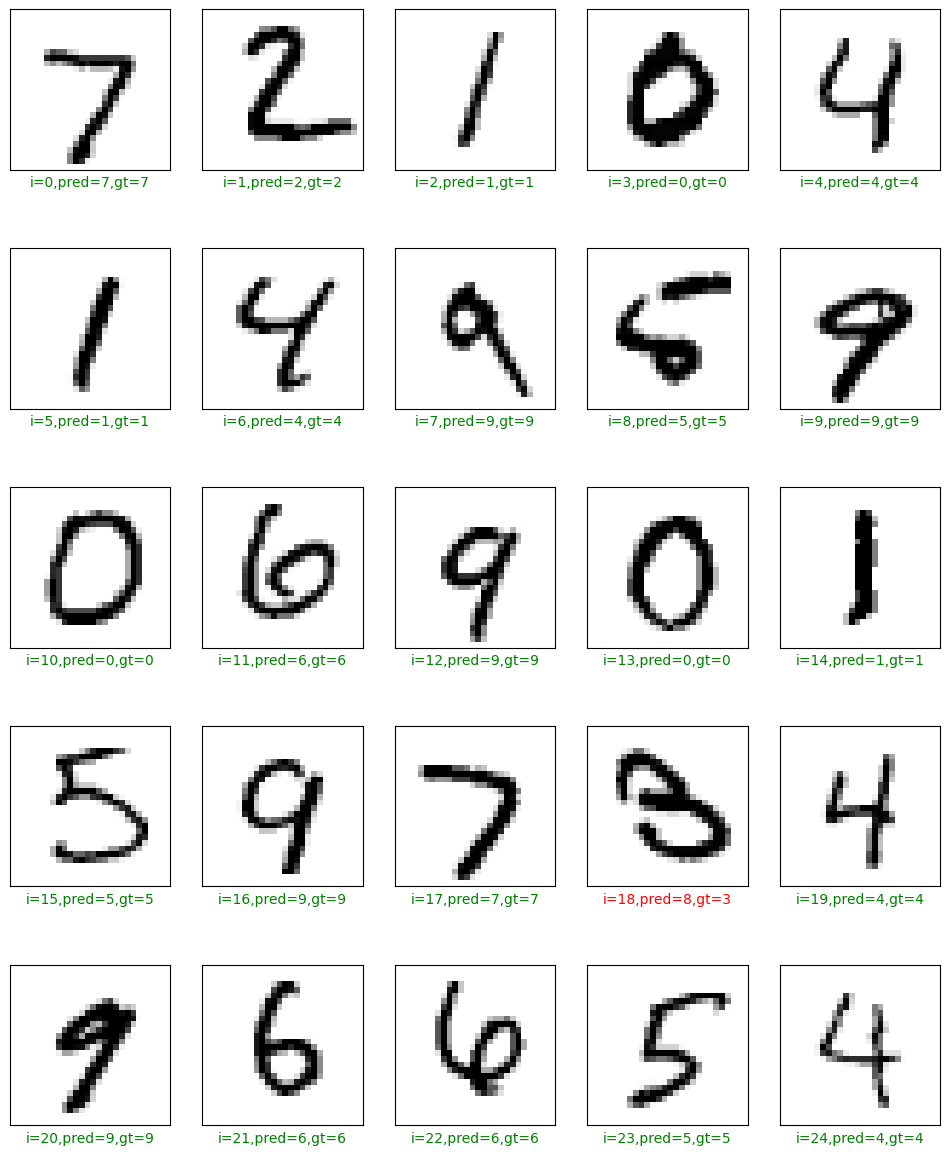

In [46]:
plt.figure(figsize=(12,15))
start_index=0

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    pred = np.argmax(y_pred[start_index+i])
    gt = y_test[start_index+i]
    
    col='g'
    if pred !=gt:
        col='r'
    
    plt.xlabel('i={},pred={},gt={}'.format(start_index+i,pred,gt),color=col)
    plt.imshow(x_test[start_index+i],cmap='binary')
plt.show()   


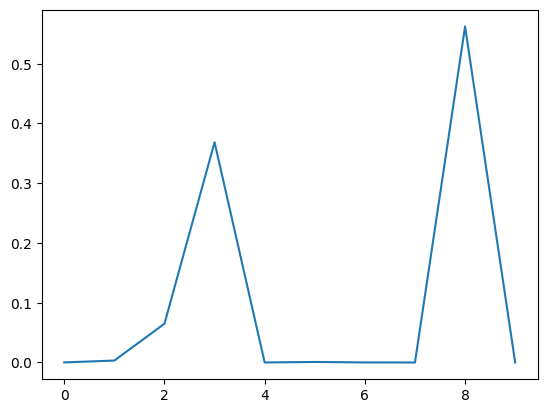

In [ ]:
plt.plot(y_pred[18])# this shows 2 spikes on for 3(gt) and other for 8(pred)